# Predict Loan Eligibility for Dream Housing Finance company

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

In [1]:
# importing the libraries 

import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)

In [2]:
# reading the data from train test and submission tables 

train=pd.read_csv("train_ctrUa4K.csv")
test=pd.read_csv("test_lAUu6dG.csv")
submission=pd.read_csv("sample_submission_49d68Cx.csv")

In [3]:
# shape of the train, test and shape 

train.shape,test.shape,submission.shape

((614, 13), (367, 12), (367, 2))

In [4]:
# concating the train and test

combined=pd.concat([train,test],ignore_index=True)

In [5]:
combined.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
# categorical columns in tha dataset

combined.select_dtypes("object").columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
# numerical columns in tha dataset

combined.select_dtypes(np.number).columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [8]:
# Bivariate analysisi

In [9]:
# unique values in Loan_Amount_Term

combined.Loan_Amount_Term.unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.,
       350.,   6.])

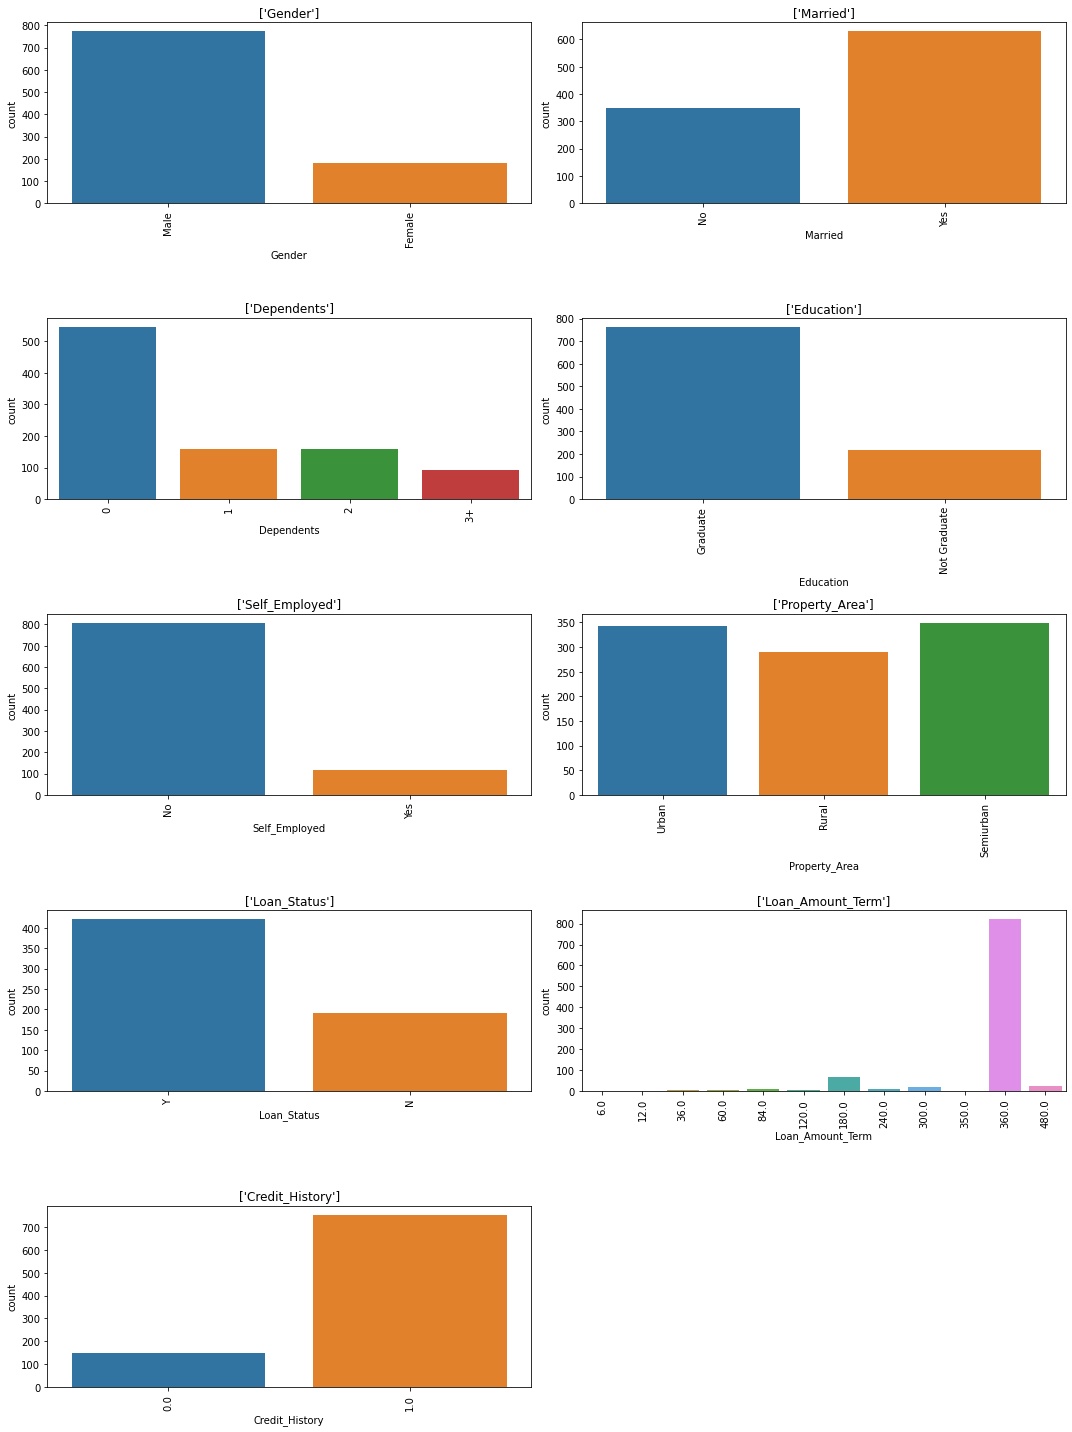

In [10]:
catcols=['Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'Property_Area', 'Loan_Status','Loan_Amount_Term',
         'Credit_History']

plt.figure(figsize=(15,20))
iterator=1
for i in catcols:
    plt.subplot(5,2,iterator)
    sns.countplot(combined[i])
    plt.title([i])
    plt.xticks(rotation=90)
    iterator+=1
plt.tight_layout()
plt.show()

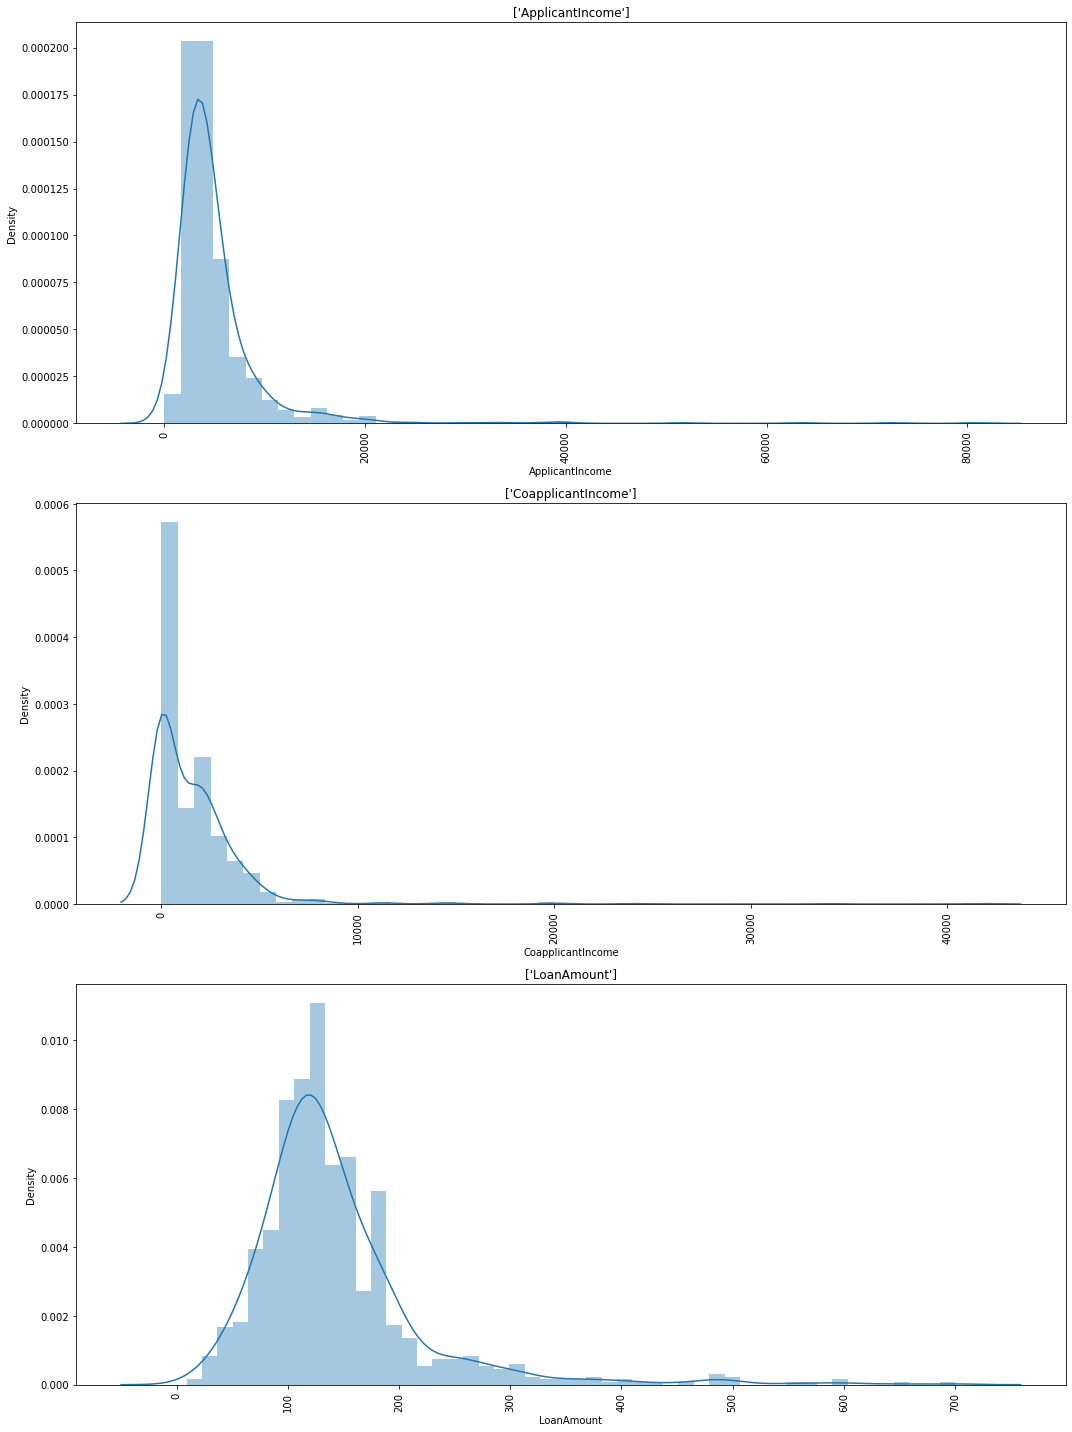

In [11]:
numcols=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

plt.figure(figsize=(15,20))
iterator=1
for i in numcols:
    plt.subplot(3,1,iterator)
    sns.distplot(combined[i])
    plt.title([i])
    plt.xticks(rotation=90)
    iterator+=1
plt.tight_layout()
plt.show()

In [12]:
# bivariate analysis

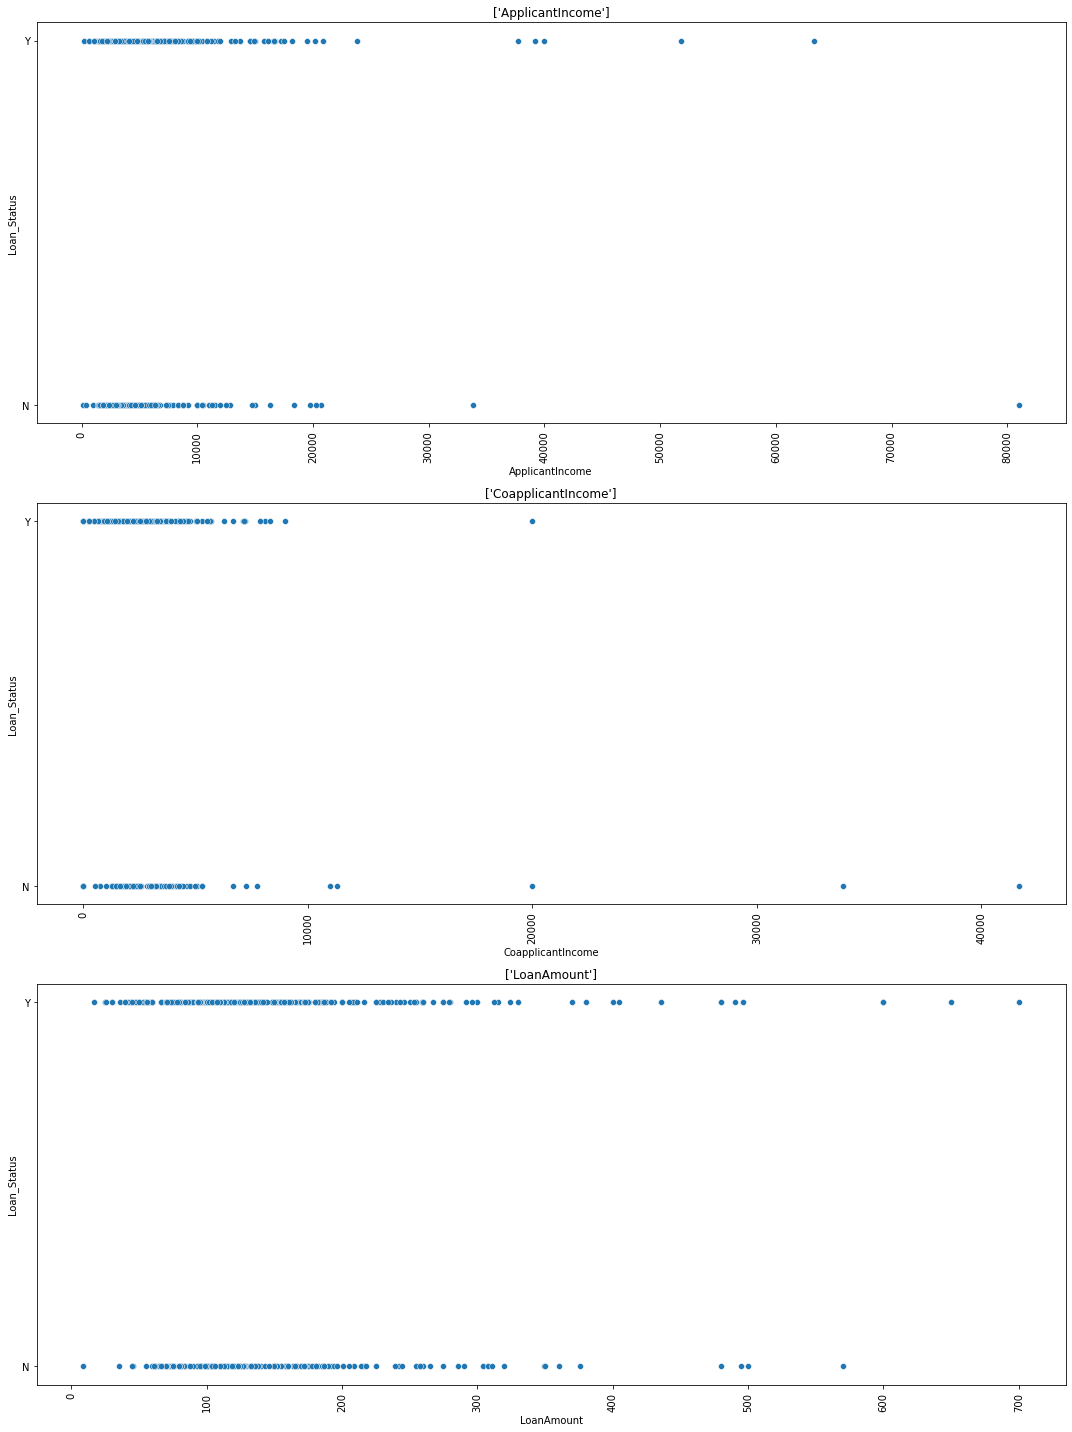

In [13]:
plt.figure(figsize=(15,20))
iterator=1
for i in numcols:
    plt.subplot(3,1,iterator)
    sns.scatterplot(combined[i],combined.Loan_Status)
    plt.title([i])
    plt.xticks(rotation=90)
    iterator+=1
plt.tight_layout()
plt.show()

<Figure size 1080x1440 with 0 Axes>

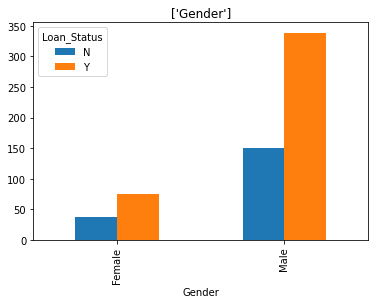

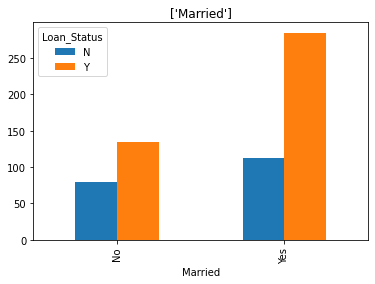

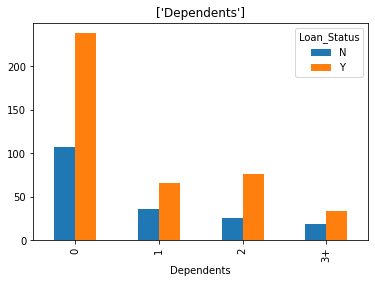

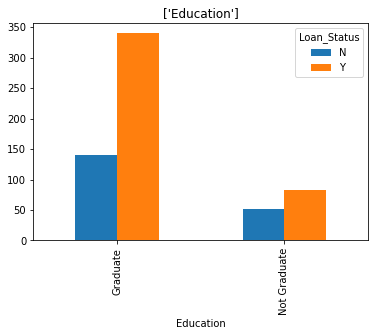

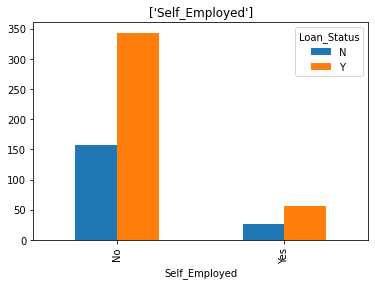

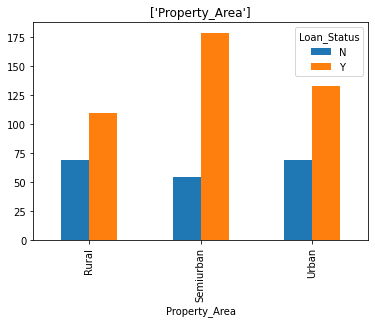

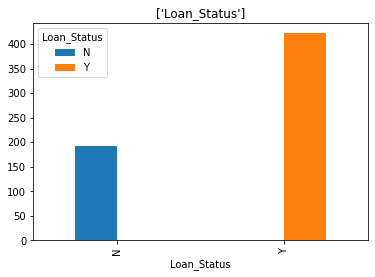

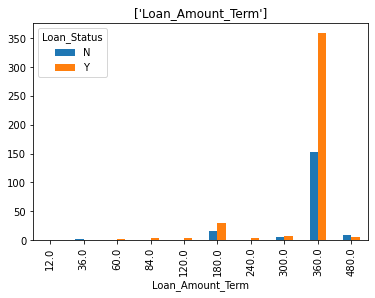

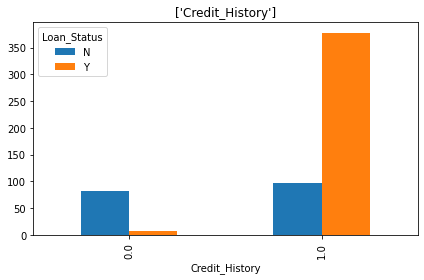

In [14]:
plt.figure(figsize=(15,20))
iterator=1
for i in catcols:
    pd.crosstab(combined[i],combined.Loan_Status).plot(kind="bar")
    plt.title([i])
    plt.xticks(rotation=90)
    iterator+=1
plt.tight_layout()
plt.show()

In [15]:
# First 5 rows of our dataset

combined.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [16]:
# Nulll values in our dataset

combined.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

#### Missing values treatment

In [17]:
# Treatment of Gender  column.

combined.Gender.fillna(combined.Gender.mode()[0],inplace=True)

In [18]:
# Treatment of Married  column.

combined.Married.fillna(combined.Married.mode()[0],inplace=True)

In [19]:
# Treatment of Dependents  column.

combined.Dependents.fillna(combined.Dependents.mode()[0],inplace=True)

In [20]:
# Treatment of Self_Employed  column.

combined.Self_Employed.fillna(combined.Self_Employed.mode()[0],inplace=True)

In [21]:
# Treatment of LoanAmount  column.

combined.LoanAmount.fillna(combined.LoanAmount.mean(),inplace=True)

In [22]:
# Treatment of Loan_Amount_Term  column.

combined.Loan_Amount_Term.fillna(combined.Loan_Amount_Term.mode()[0],inplace=True)

In [23]:
# Treatment of Credit_History  column.

combined.Credit_History.fillna(combined.Credit_History.mode()[0],inplace=True)


In [24]:
# first five rows of our dataset

combined.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,142.51153,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.00000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.00000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.00000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.00000,360.0,1.0,Urban,Y


#### Feature engineering

In [25]:
combined["Magic1"]=combined.groupby(by=["Gender","Education"])["Loan_ID"].transform("nunique")

In [26]:
combined["Magic2"]=combined.groupby(by=["Gender","Credit_History"])["Loan_ID"].transform("nunique")

In [27]:
combined["Magic3"]=combined.groupby(by=["Married","Education"])["Loan_ID"].transform("nunique")

In [28]:
combined["Magic4"]=combined.groupby(by=["Married","Credit_History"])["Loan_ID"].transform("nunique")

In [29]:
combined["Magic5"]=combined.groupby(by=["Married","Property_Area"])["Loan_ID"].transform("nunique")

In [30]:
combined["Magic6"]=combined.groupby(by=["Dependents","Credit_History"])["Loan_ID"].transform("nunique")

In [31]:
combined["Magic7"]=combined.groupby(by=["Education","Credit_History"])["Loan_ID"].transform("nunique")

In [32]:
combined["Magic8"]=combined.groupby(by=["Education","Property_Area"])["Loan_ID"].transform("nunique")

In [33]:
combined["Magic9"]=combined.groupby(by=["Self_Employed","Credit_History"])["Loan_ID"].transform("nunique")

In [34]:
combined["Magic10"]=combined.groupby(by=["Loan_Amount_Term","Property_Area"])["Loan_ID"].transform("nunique")

In [35]:
combined["Magic11"]=combined.groupby(by=["Loan_Amount_Term","Credit_History"])["Loan_ID"].transform("nunique")

In [36]:
combined["Magic12"]=combined.groupby(by=["Credit_History","Property_Area"])["Loan_ID"].transform("nunique")

In [37]:
combined["Magic13"]=combined.groupby(by=["Gender","Married","Education"])["Loan_ID"].transform("nunique")

In [38]:
combined["Dependents"]=pd.factorize(combined.Dependents)[0]

In [39]:
combined.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [40]:
combined.Loan_Status=np.where(combined.Loan_Status=="Y",1,0)

In [41]:
#### Drop the unnecessary columns.

In [42]:
combined.drop("Loan_ID",axis=1,inplace=True)

In [43]:
numcols=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

In [44]:
combined.loc[:,numcols].skew()

ApplicantIncome      7.086961
CoapplicantIncome    6.844109
LoanAmount           2.752055
dtype: float64

#### Encoding

In [45]:
newdata=pd.get_dummies(combined,drop_first=True)

In [46]:
# made the copy file of our data

newdata.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Magic1,Magic2,Magic3,Magic4,Magic5,Magic6,Magic7,Magic8,Magic9,Magic10,Magic11,Magic12,Magic13,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0,5849,0.0,142.51153,360.0,1.0,1,615,681,275,291,119,487,657,273,728,284,721,293,174,1,0,0,0,0,1
1,1,4583,1508.0,128.00000,360.0,1.0,0,615,681,488,542,187,140,657,216,728,255,721,242,441,1,1,0,0,0,0
2,0,3000,0.0,66.00000,360.0,1.0,1,615,681,488,542,223,487,657,273,105,284,721,293,441,1,1,0,1,0,1
3,0,2583,2358.0,120.00000,360.0,1.0,1,184,681,146,542,223,487,176,69,728,284,721,293,135,1,1,1,0,0,1
4,0,6000,0.0,141.00000,360.0,1.0,1,615,681,275,291,119,487,657,273,728,284,721,293,174,1,0,0,0,0,1


# Modeling

In [47]:
# Split the data in train test in newtrain and newtest

newtrain=newdata.loc[0:train.shape[0]-1,:]
newtest=newdata.loc[train.shape[0]:,:]

In [48]:
# drop the target variable from train test

X=newtrain.drop("Loan_Status",axis=1)
newtest=newtest.drop("Loan_Status",axis=1)
y=newtrain.Loan_Status

In [49]:
# importing the necessary library

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.metrics import f1_score


In [50]:
# deifng the base model for applying all the models

def base_models():
    models=dict()
    models["lg"]=LogisticRegression()
    models["tree"]=DecisionTreeClassifier(criterion="entropy")
    models["rf"]=RandomForestClassifier(criterion="entropy")
    models["gbm"]=GradientBoostingClassifier()
    models["xgb"]=XGBClassifier()
    models["lgbm"]=LGBMClassifier()
    models["catboost"]=CatBoostClassifier()
    return models

In [51]:
# evaluation function

def eval_score(model):
    cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
    score=cross_val_score(model,X,y,scoring="roc_auc",cv=cv,error_score="raise",n_jobs=-1)
    return score

In [52]:
# applying all the models in one go

result,names=list(),list()
models=base_models()
for name, model in models.items():
    finalscore=eval_score(model)
    result.append(finalscore)
    names.append(name)
    print('%s %.3f(%.3f)'%(name,np.mean(result),np.std(result)))

lg 0.708(0.026)
tree 0.669(0.053)
rf 0.699(0.061)
gbm 0.705(0.059)
xgb 0.716(0.059)
lgbm 0.721(0.057)
catboost 0.724(0.056)


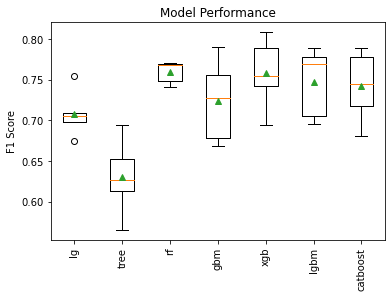

In [53]:
# visualization result of all our mdoels

plt.boxplot(result,labels=names,showmeans=True)
plt.xticks(rotation=90)
plt.ylabel("F1 Score")
plt.title("Model Performance")
plt.show()

In [54]:
# XGBClassifier model

xgb=XGBClassifier()
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

pred_xgb=[]
for train_index,test_index in kfold.split(X,y):
    xtrain=X.iloc[train_index]
    ytrain=y.iloc[train_index]
    pred_xgb.append(xgb.fit(xtrain,ytrain).predict(newtest))

In [55]:
submission["Loan_Status"]=pd.DataFrame(np.array(pred_xgb)[0])

In [56]:
submission.Loan_Status=np.where(submission.Loan_Status==1,"Y","N")

In [57]:
submission.to_csv("XGBMODEL_LoanPrediction.csv",index=False)

In [58]:
cd

C:\Users\agarw


In [59]:
# CatBoostClassifier model

catboost=CatBoostClassifier()
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

pred_catboost=[]
for train_index,test_index in kfold.split(X,y):
    xtrain=X.iloc[train_index]
    ytrain=y.iloc[train_index]
    pred_catboost.append(catboost.fit(xtrain,ytrain).predict(newtest))

Learning rate set to 0.007604
0:	learn: 0.6895465	total: 152ms	remaining: 2m 31s
1:	learn: 0.6857219	total: 157ms	remaining: 1m 18s
2:	learn: 0.6822671	total: 161ms	remaining: 53.4s
3:	learn: 0.6785993	total: 162ms	remaining: 40.4s
4:	learn: 0.6748589	total: 164ms	remaining: 32.7s
5:	learn: 0.6714425	total: 166ms	remaining: 27.5s
6:	learn: 0.6680496	total: 168ms	remaining: 23.8s
7:	learn: 0.6646676	total: 170ms	remaining: 21.1s
8:	learn: 0.6612932	total: 171ms	remaining: 18.9s
9:	learn: 0.6578404	total: 175ms	remaining: 17.3s
10:	learn: 0.6545235	total: 177ms	remaining: 15.9s
11:	learn: 0.6509469	total: 179ms	remaining: 14.7s
12:	learn: 0.6477761	total: 181ms	remaining: 13.7s
13:	learn: 0.6444079	total: 184ms	remaining: 13s
14:	learn: 0.6411632	total: 187ms	remaining: 12.2s
15:	learn: 0.6382911	total: 189ms	remaining: 11.6s
16:	learn: 0.6355474	total: 191ms	remaining: 11s
17:	learn: 0.6323339	total: 192ms	remaining: 10.5s
18:	learn: 0.6295044	total: 194ms	remaining: 10s
19:	learn: 0.62

162:	learn: 0.4479646	total: 486ms	remaining: 2.49s
163:	learn: 0.4473709	total: 488ms	remaining: 2.48s
164:	learn: 0.4467267	total: 490ms	remaining: 2.48s
165:	learn: 0.4465302	total: 491ms	remaining: 2.46s
166:	learn: 0.4460362	total: 493ms	remaining: 2.46s
167:	learn: 0.4455308	total: 497ms	remaining: 2.46s
168:	learn: 0.4449242	total: 502ms	remaining: 2.47s
169:	learn: 0.4447148	total: 504ms	remaining: 2.46s
170:	learn: 0.4438683	total: 506ms	remaining: 2.45s
171:	learn: 0.4432276	total: 508ms	remaining: 2.44s
172:	learn: 0.4425596	total: 510ms	remaining: 2.44s
173:	learn: 0.4420216	total: 513ms	remaining: 2.43s
174:	learn: 0.4415173	total: 517ms	remaining: 2.44s
175:	learn: 0.4408186	total: 520ms	remaining: 2.43s
176:	learn: 0.4402885	total: 524ms	remaining: 2.44s
177:	learn: 0.4398208	total: 526ms	remaining: 2.43s
178:	learn: 0.4394755	total: 528ms	remaining: 2.42s
179:	learn: 0.4390588	total: 530ms	remaining: 2.42s
180:	learn: 0.4388134	total: 533ms	remaining: 2.41s
181:	learn: 

340:	learn: 0.3809059	total: 834ms	remaining: 1.61s
341:	learn: 0.3805510	total: 836ms	remaining: 1.61s
342:	learn: 0.3801350	total: 839ms	remaining: 1.61s
343:	learn: 0.3799818	total: 841ms	remaining: 1.6s
344:	learn: 0.3796980	total: 844ms	remaining: 1.6s
345:	learn: 0.3794630	total: 847ms	remaining: 1.6s
346:	learn: 0.3790682	total: 849ms	remaining: 1.6s
347:	learn: 0.3789259	total: 854ms	remaining: 1.6s
348:	learn: 0.3785528	total: 855ms	remaining: 1.59s
349:	learn: 0.3783102	total: 858ms	remaining: 1.59s
350:	learn: 0.3782492	total: 859ms	remaining: 1.59s
351:	learn: 0.3779052	total: 861ms	remaining: 1.58s
352:	learn: 0.3777043	total: 863ms	remaining: 1.58s
353:	learn: 0.3775204	total: 865ms	remaining: 1.58s
354:	learn: 0.3769068	total: 867ms	remaining: 1.57s
355:	learn: 0.3767479	total: 870ms	remaining: 1.57s
356:	learn: 0.3764323	total: 873ms	remaining: 1.57s
357:	learn: 0.3761468	total: 876ms	remaining: 1.57s
358:	learn: 0.3760247	total: 878ms	remaining: 1.57s
359:	learn: 0.375

533:	learn: 0.3363977	total: 1.18s	remaining: 1.03s
534:	learn: 0.3361771	total: 1.18s	remaining: 1.03s
535:	learn: 0.3360796	total: 1.18s	remaining: 1.02s
536:	learn: 0.3359768	total: 1.19s	remaining: 1.02s
537:	learn: 0.3358677	total: 1.19s	remaining: 1.02s
538:	learn: 0.3355303	total: 1.19s	remaining: 1.02s
539:	learn: 0.3353459	total: 1.19s	remaining: 1.01s
540:	learn: 0.3350798	total: 1.19s	remaining: 1.01s
541:	learn: 0.3349832	total: 1.2s	remaining: 1.01s
542:	learn: 0.3348106	total: 1.2s	remaining: 1.01s
543:	learn: 0.3347865	total: 1.2s	remaining: 1s
544:	learn: 0.3347183	total: 1.2s	remaining: 1s
545:	learn: 0.3344868	total: 1.2s	remaining: 1s
546:	learn: 0.3343545	total: 1.21s	remaining: 1s
547:	learn: 0.3341601	total: 1.21s	remaining: 1s
548:	learn: 0.3339333	total: 1.22s	remaining: 1000ms
549:	learn: 0.3338842	total: 1.22s	remaining: 997ms
550:	learn: 0.3336096	total: 1.22s	remaining: 995ms
551:	learn: 0.3334632	total: 1.22s	remaining: 994ms
552:	learn: 0.3333306	total: 1.

718:	learn: 0.3050439	total: 1.52s	remaining: 594ms
719:	learn: 0.3048607	total: 1.52s	remaining: 592ms
720:	learn: 0.3046079	total: 1.52s	remaining: 590ms
721:	learn: 0.3044926	total: 1.53s	remaining: 588ms
722:	learn: 0.3043586	total: 1.53s	remaining: 585ms
723:	learn: 0.3041887	total: 1.53s	remaining: 583ms
724:	learn: 0.3041722	total: 1.53s	remaining: 581ms
725:	learn: 0.3040183	total: 1.53s	remaining: 579ms
726:	learn: 0.3038804	total: 1.53s	remaining: 576ms
727:	learn: 0.3036364	total: 1.54s	remaining: 574ms
728:	learn: 0.3034583	total: 1.54s	remaining: 572ms
729:	learn: 0.3031116	total: 1.54s	remaining: 569ms
730:	learn: 0.3030172	total: 1.54s	remaining: 567ms
731:	learn: 0.3028807	total: 1.54s	remaining: 565ms
732:	learn: 0.3027672	total: 1.54s	remaining: 563ms
733:	learn: 0.3025733	total: 1.55s	remaining: 561ms
734:	learn: 0.3024589	total: 1.55s	remaining: 558ms
735:	learn: 0.3024183	total: 1.55s	remaining: 556ms
736:	learn: 0.3022392	total: 1.55s	remaining: 555ms
737:	learn: 

903:	learn: 0.2748606	total: 1.87s	remaining: 199ms
904:	learn: 0.2747572	total: 1.87s	remaining: 197ms
905:	learn: 0.2747143	total: 1.88s	remaining: 195ms
906:	learn: 0.2746511	total: 1.88s	remaining: 193ms
907:	learn: 0.2744533	total: 1.88s	remaining: 191ms
908:	learn: 0.2742834	total: 1.89s	remaining: 189ms
909:	learn: 0.2741534	total: 1.89s	remaining: 187ms
910:	learn: 0.2739595	total: 1.89s	remaining: 185ms
911:	learn: 0.2739515	total: 1.89s	remaining: 182ms
912:	learn: 0.2738436	total: 1.89s	remaining: 180ms
913:	learn: 0.2737090	total: 1.89s	remaining: 178ms
914:	learn: 0.2736313	total: 1.9s	remaining: 176ms
915:	learn: 0.2734397	total: 1.9s	remaining: 174ms
916:	learn: 0.2733552	total: 1.9s	remaining: 172ms
917:	learn: 0.2732636	total: 1.9s	remaining: 170ms
918:	learn: 0.2732449	total: 1.91s	remaining: 168ms
919:	learn: 0.2730952	total: 1.91s	remaining: 166ms
920:	learn: 0.2729052	total: 1.91s	remaining: 164ms
921:	learn: 0.2728760	total: 1.91s	remaining: 162ms
922:	learn: 0.27

65:	learn: 0.5243826	total: 130ms	remaining: 1.85s
66:	learn: 0.5229082	total: 132ms	remaining: 1.84s
67:	learn: 0.5213481	total: 134ms	remaining: 1.83s
68:	learn: 0.5196367	total: 136ms	remaining: 1.83s
69:	learn: 0.5182763	total: 138ms	remaining: 1.83s
70:	learn: 0.5165710	total: 141ms	remaining: 1.85s
71:	learn: 0.5154751	total: 143ms	remaining: 1.84s
72:	learn: 0.5139312	total: 146ms	remaining: 1.85s
73:	learn: 0.5124761	total: 148ms	remaining: 1.86s
74:	learn: 0.5107393	total: 151ms	remaining: 1.86s
75:	learn: 0.5097845	total: 152ms	remaining: 1.85s
76:	learn: 0.5083946	total: 155ms	remaining: 1.85s
77:	learn: 0.5074996	total: 156ms	remaining: 1.84s
78:	learn: 0.5064543	total: 158ms	remaining: 1.84s
79:	learn: 0.5048596	total: 160ms	remaining: 1.84s
80:	learn: 0.5038453	total: 161ms	remaining: 1.83s
81:	learn: 0.5023581	total: 163ms	remaining: 1.82s
82:	learn: 0.5014412	total: 164ms	remaining: 1.81s
83:	learn: 0.5000604	total: 166ms	remaining: 1.81s
84:	learn: 0.4987801	total: 168

269:	learn: 0.3945916	total: 478ms	remaining: 1.29s
270:	learn: 0.3943404	total: 480ms	remaining: 1.29s
271:	learn: 0.3940158	total: 482ms	remaining: 1.29s
272:	learn: 0.3935038	total: 484ms	remaining: 1.29s
273:	learn: 0.3932034	total: 486ms	remaining: 1.29s
274:	learn: 0.3930309	total: 489ms	remaining: 1.29s
275:	learn: 0.3927633	total: 492ms	remaining: 1.29s
276:	learn: 0.3924179	total: 493ms	remaining: 1.29s
277:	learn: 0.3920482	total: 495ms	remaining: 1.28s
278:	learn: 0.3918008	total: 496ms	remaining: 1.28s
279:	learn: 0.3914116	total: 498ms	remaining: 1.28s
280:	learn: 0.3910931	total: 499ms	remaining: 1.28s
281:	learn: 0.3905984	total: 501ms	remaining: 1.27s
282:	learn: 0.3902350	total: 502ms	remaining: 1.27s
283:	learn: 0.3897012	total: 504ms	remaining: 1.27s
284:	learn: 0.3895128	total: 505ms	remaining: 1.27s
285:	learn: 0.3890635	total: 508ms	remaining: 1.27s
286:	learn: 0.3889316	total: 509ms	remaining: 1.26s
287:	learn: 0.3884517	total: 510ms	remaining: 1.26s
288:	learn: 

488:	learn: 0.3344203	total: 830ms	remaining: 867ms
489:	learn: 0.3343995	total: 831ms	remaining: 865ms
490:	learn: 0.3340230	total: 833ms	remaining: 864ms
491:	learn: 0.3337438	total: 835ms	remaining: 863ms
492:	learn: 0.3335070	total: 838ms	remaining: 861ms
493:	learn: 0.3334145	total: 840ms	remaining: 860ms
494:	learn: 0.3331187	total: 842ms	remaining: 859ms
495:	learn: 0.3327358	total: 844ms	remaining: 858ms
496:	learn: 0.3325856	total: 846ms	remaining: 856ms
497:	learn: 0.3323249	total: 847ms	remaining: 854ms
498:	learn: 0.3322566	total: 849ms	remaining: 853ms
499:	learn: 0.3320644	total: 851ms	remaining: 851ms
500:	learn: 0.3315099	total: 852ms	remaining: 849ms
501:	learn: 0.3313469	total: 854ms	remaining: 847ms
502:	learn: 0.3311863	total: 855ms	remaining: 845ms
503:	learn: 0.3307849	total: 857ms	remaining: 843ms
504:	learn: 0.3306636	total: 858ms	remaining: 841ms
505:	learn: 0.3303342	total: 860ms	remaining: 839ms
506:	learn: 0.3301972	total: 861ms	remaining: 838ms
507:	learn: 

698:	learn: 0.2932096	total: 1.18s	remaining: 507ms
699:	learn: 0.2930073	total: 1.18s	remaining: 505ms
700:	learn: 0.2926819	total: 1.18s	remaining: 504ms
701:	learn: 0.2925058	total: 1.18s	remaining: 502ms
702:	learn: 0.2923878	total: 1.18s	remaining: 500ms
703:	learn: 0.2922043	total: 1.19s	remaining: 499ms
704:	learn: 0.2920273	total: 1.19s	remaining: 498ms
705:	learn: 0.2919669	total: 1.19s	remaining: 497ms
706:	learn: 0.2918326	total: 1.19s	remaining: 495ms
707:	learn: 0.2916326	total: 1.2s	remaining: 493ms
708:	learn: 0.2913218	total: 1.2s	remaining: 491ms
709:	learn: 0.2911216	total: 1.2s	remaining: 490ms
710:	learn: 0.2910089	total: 1.2s	remaining: 488ms
711:	learn: 0.2909235	total: 1.2s	remaining: 486ms
712:	learn: 0.2908096	total: 1.2s	remaining: 484ms
713:	learn: 0.2907268	total: 1.21s	remaining: 483ms
714:	learn: 0.2905505	total: 1.21s	remaining: 482ms
715:	learn: 0.2902570	total: 1.21s	remaining: 480ms
716:	learn: 0.2901860	total: 1.21s	remaining: 478ms
717:	learn: 0.2899

899:	learn: 0.2621572	total: 1.53s	remaining: 170ms
900:	learn: 0.2619923	total: 1.53s	remaining: 168ms
901:	learn: 0.2616003	total: 1.53s	remaining: 167ms
902:	learn: 0.2613426	total: 1.54s	remaining: 165ms
903:	learn: 0.2611529	total: 1.54s	remaining: 163ms
904:	learn: 0.2610745	total: 1.54s	remaining: 162ms
905:	learn: 0.2610326	total: 1.54s	remaining: 160ms
906:	learn: 0.2607233	total: 1.54s	remaining: 158ms
907:	learn: 0.2605563	total: 1.55s	remaining: 157ms
908:	learn: 0.2604675	total: 1.55s	remaining: 155ms
909:	learn: 0.2602930	total: 1.55s	remaining: 153ms
910:	learn: 0.2600490	total: 1.55s	remaining: 152ms
911:	learn: 0.2599777	total: 1.55s	remaining: 150ms
912:	learn: 0.2598211	total: 1.56s	remaining: 148ms
913:	learn: 0.2597276	total: 1.56s	remaining: 147ms
914:	learn: 0.2596832	total: 1.56s	remaining: 145ms
915:	learn: 0.2594249	total: 1.56s	remaining: 143ms
916:	learn: 0.2592774	total: 1.56s	remaining: 142ms
917:	learn: 0.2592176	total: 1.56s	remaining: 140ms
918:	learn: 

65:	learn: 0.5244847	total: 109ms	remaining: 1.54s
66:	learn: 0.5231632	total: 111ms	remaining: 1.54s
67:	learn: 0.5216508	total: 113ms	remaining: 1.55s
68:	learn: 0.5202019	total: 115ms	remaining: 1.55s
69:	learn: 0.5186002	total: 117ms	remaining: 1.56s
70:	learn: 0.5171080	total: 122ms	remaining: 1.59s
71:	learn: 0.5156266	total: 124ms	remaining: 1.59s
72:	learn: 0.5143429	total: 125ms	remaining: 1.59s
73:	learn: 0.5125318	total: 127ms	remaining: 1.59s
74:	learn: 0.5115208	total: 128ms	remaining: 1.58s
75:	learn: 0.5100232	total: 130ms	remaining: 1.58s
76:	learn: 0.5087906	total: 132ms	remaining: 1.58s
77:	learn: 0.5070658	total: 134ms	remaining: 1.58s
78:	learn: 0.5058844	total: 137ms	remaining: 1.59s
79:	learn: 0.5048034	total: 138ms	remaining: 1.59s
80:	learn: 0.5036220	total: 140ms	remaining: 1.59s
81:	learn: 0.5025507	total: 142ms	remaining: 1.58s
82:	learn: 0.5013136	total: 143ms	remaining: 1.58s
83:	learn: 0.5000011	total: 145ms	remaining: 1.58s
84:	learn: 0.4989229	total: 146

261:	learn: 0.3906844	total: 457ms	remaining: 1.29s
262:	learn: 0.3904459	total: 458ms	remaining: 1.28s
263:	learn: 0.3900192	total: 461ms	remaining: 1.28s
264:	learn: 0.3898178	total: 463ms	remaining: 1.28s
265:	learn: 0.3890319	total: 465ms	remaining: 1.28s
266:	learn: 0.3887607	total: 467ms	remaining: 1.28s
267:	learn: 0.3884600	total: 470ms	remaining: 1.28s
268:	learn: 0.3878727	total: 473ms	remaining: 1.28s
269:	learn: 0.3875247	total: 475ms	remaining: 1.28s
270:	learn: 0.3872877	total: 477ms	remaining: 1.28s
271:	learn: 0.3867064	total: 479ms	remaining: 1.28s
272:	learn: 0.3863888	total: 480ms	remaining: 1.28s
273:	learn: 0.3857271	total: 482ms	remaining: 1.28s
274:	learn: 0.3851048	total: 484ms	remaining: 1.27s
275:	learn: 0.3846300	total: 486ms	remaining: 1.27s
276:	learn: 0.3844014	total: 488ms	remaining: 1.27s
277:	learn: 0.3841267	total: 490ms	remaining: 1.27s
278:	learn: 0.3838865	total: 491ms	remaining: 1.27s
279:	learn: 0.3837136	total: 493ms	remaining: 1.27s
280:	learn: 

465:	learn: 0.3352563	total: 801ms	remaining: 918ms
466:	learn: 0.3350384	total: 803ms	remaining: 916ms
467:	learn: 0.3349218	total: 804ms	remaining: 914ms
468:	learn: 0.3346715	total: 806ms	remaining: 912ms
469:	learn: 0.3346567	total: 807ms	remaining: 910ms
470:	learn: 0.3344594	total: 808ms	remaining: 908ms
471:	learn: 0.3340898	total: 810ms	remaining: 906ms
472:	learn: 0.3339673	total: 812ms	remaining: 905ms
473:	learn: 0.3335207	total: 814ms	remaining: 903ms
474:	learn: 0.3333893	total: 816ms	remaining: 902ms
475:	learn: 0.3331301	total: 818ms	remaining: 901ms
476:	learn: 0.3329998	total: 820ms	remaining: 899ms
477:	learn: 0.3328758	total: 823ms	remaining: 898ms
478:	learn: 0.3326254	total: 825ms	remaining: 898ms
479:	learn: 0.3324318	total: 828ms	remaining: 897ms
480:	learn: 0.3320727	total: 829ms	remaining: 895ms
481:	learn: 0.3318437	total: 831ms	remaining: 893ms
482:	learn: 0.3316928	total: 832ms	remaining: 891ms
483:	learn: 0.3313407	total: 834ms	remaining: 889ms
484:	learn: 

629:	learn: 0.3004459	total: 1.14s	remaining: 669ms
630:	learn: 0.3002835	total: 1.14s	remaining: 667ms
631:	learn: 0.3000947	total: 1.14s	remaining: 666ms
632:	learn: 0.2999390	total: 1.15s	remaining: 665ms
633:	learn: 0.2995462	total: 1.15s	remaining: 663ms
634:	learn: 0.2994582	total: 1.15s	remaining: 662ms
635:	learn: 0.2993292	total: 1.15s	remaining: 660ms
636:	learn: 0.2991887	total: 1.16s	remaining: 659ms
637:	learn: 0.2991112	total: 1.16s	remaining: 658ms
638:	learn: 0.2989556	total: 1.16s	remaining: 657ms
639:	learn: 0.2984189	total: 1.16s	remaining: 655ms
640:	learn: 0.2983468	total: 1.17s	remaining: 653ms
641:	learn: 0.2980012	total: 1.17s	remaining: 652ms
642:	learn: 0.2978261	total: 1.17s	remaining: 650ms
643:	learn: 0.2976866	total: 1.17s	remaining: 648ms
644:	learn: 0.2976232	total: 1.17s	remaining: 646ms
645:	learn: 0.2973125	total: 1.18s	remaining: 644ms
646:	learn: 0.2970656	total: 1.18s	remaining: 642ms
647:	learn: 0.2968289	total: 1.18s	remaining: 640ms
648:	learn: 

831:	learn: 0.2647753	total: 1.49s	remaining: 301ms
832:	learn: 0.2646146	total: 1.49s	remaining: 299ms
833:	learn: 0.2644914	total: 1.49s	remaining: 297ms
834:	learn: 0.2644546	total: 1.5s	remaining: 295ms
835:	learn: 0.2643776	total: 1.5s	remaining: 294ms
836:	learn: 0.2642007	total: 1.5s	remaining: 292ms
837:	learn: 0.2641496	total: 1.5s	remaining: 291ms
838:	learn: 0.2639886	total: 1.5s	remaining: 289ms
839:	learn: 0.2638590	total: 1.51s	remaining: 287ms
840:	learn: 0.2638236	total: 1.51s	remaining: 285ms
841:	learn: 0.2637538	total: 1.51s	remaining: 283ms
842:	learn: 0.2637057	total: 1.51s	remaining: 281ms
843:	learn: 0.2634920	total: 1.51s	remaining: 279ms
844:	learn: 0.2634368	total: 1.51s	remaining: 278ms
845:	learn: 0.2631747	total: 1.52s	remaining: 276ms
846:	learn: 0.2628697	total: 1.52s	remaining: 274ms
847:	learn: 0.2627306	total: 1.52s	remaining: 273ms
848:	learn: 0.2626095	total: 1.52s	remaining: 271ms
849:	learn: 0.2623769	total: 1.52s	remaining: 269ms
850:	learn: 0.262

2:	learn: 0.6808550	total: 6.33ms	remaining: 2.1s
3:	learn: 0.6765480	total: 8.77ms	remaining: 2.18s
4:	learn: 0.6727347	total: 11ms	remaining: 2.19s
5:	learn: 0.6691298	total: 12.9ms	remaining: 2.14s
6:	learn: 0.6648877	total: 15ms	remaining: 2.13s
7:	learn: 0.6614570	total: 16.7ms	remaining: 2.07s
8:	learn: 0.6580580	total: 19.2ms	remaining: 2.11s
9:	learn: 0.6544660	total: 21.2ms	remaining: 2.1s
10:	learn: 0.6510356	total: 22.6ms	remaining: 2.04s
11:	learn: 0.6477782	total: 24.2ms	remaining: 1.99s
12:	learn: 0.6444732	total: 25.3ms	remaining: 1.92s
13:	learn: 0.6406663	total: 27ms	remaining: 1.9s
14:	learn: 0.6376312	total: 27.9ms	remaining: 1.83s
15:	learn: 0.6340167	total: 30ms	remaining: 1.85s
16:	learn: 0.6307257	total: 31.8ms	remaining: 1.84s
17:	learn: 0.6275501	total: 33.3ms	remaining: 1.82s
18:	learn: 0.6241043	total: 34.9ms	remaining: 1.8s
19:	learn: 0.6206555	total: 36.7ms	remaining: 1.8s
20:	learn: 0.6173981	total: 38.3ms	remaining: 1.79s
21:	learn: 0.6145756	total: 39.3m

197:	learn: 0.4145253	total: 351ms	remaining: 1.42s
198:	learn: 0.4141353	total: 353ms	remaining: 1.42s
199:	learn: 0.4136789	total: 355ms	remaining: 1.42s
200:	learn: 0.4132255	total: 357ms	remaining: 1.42s
201:	learn: 0.4126593	total: 360ms	remaining: 1.42s
202:	learn: 0.4117962	total: 362ms	remaining: 1.42s
203:	learn: 0.4112010	total: 364ms	remaining: 1.42s
204:	learn: 0.4108585	total: 367ms	remaining: 1.42s
205:	learn: 0.4104338	total: 369ms	remaining: 1.42s
206:	learn: 0.4100822	total: 370ms	remaining: 1.42s
207:	learn: 0.4098602	total: 372ms	remaining: 1.42s
208:	learn: 0.4093353	total: 374ms	remaining: 1.41s
209:	learn: 0.4089402	total: 376ms	remaining: 1.41s
210:	learn: 0.4085348	total: 378ms	remaining: 1.41s
211:	learn: 0.4079564	total: 380ms	remaining: 1.41s
212:	learn: 0.4073360	total: 382ms	remaining: 1.41s
213:	learn: 0.4066855	total: 383ms	remaining: 1.41s
214:	learn: 0.4061301	total: 386ms	remaining: 1.41s
215:	learn: 0.4057251	total: 387ms	remaining: 1.41s
216:	learn: 

364:	learn: 0.3592041	total: 692ms	remaining: 1.2s
365:	learn: 0.3590214	total: 695ms	remaining: 1.2s
366:	learn: 0.3585857	total: 698ms	remaining: 1.2s
367:	learn: 0.3581510	total: 700ms	remaining: 1.2s
368:	learn: 0.3578207	total: 702ms	remaining: 1.2s
369:	learn: 0.3575961	total: 704ms	remaining: 1.2s
370:	learn: 0.3572669	total: 706ms	remaining: 1.2s
371:	learn: 0.3570341	total: 708ms	remaining: 1.19s
372:	learn: 0.3567353	total: 711ms	remaining: 1.2s
373:	learn: 0.3565913	total: 712ms	remaining: 1.19s
374:	learn: 0.3562172	total: 714ms	remaining: 1.19s
375:	learn: 0.3560628	total: 716ms	remaining: 1.19s
376:	learn: 0.3559636	total: 717ms	remaining: 1.19s
377:	learn: 0.3559547	total: 718ms	remaining: 1.18s
378:	learn: 0.3558299	total: 719ms	remaining: 1.18s
379:	learn: 0.3555850	total: 721ms	remaining: 1.18s
380:	learn: 0.3553872	total: 722ms	remaining: 1.17s
381:	learn: 0.3551189	total: 724ms	remaining: 1.17s
382:	learn: 0.3547971	total: 726ms	remaining: 1.17s
383:	learn: 0.354712

580:	learn: 0.3114158	total: 1.04s	remaining: 749ms
581:	learn: 0.3113379	total: 1.04s	remaining: 748ms
582:	learn: 0.3111951	total: 1.04s	remaining: 746ms
583:	learn: 0.3110096	total: 1.04s	remaining: 745ms
584:	learn: 0.3108379	total: 1.05s	remaining: 743ms
585:	learn: 0.3107304	total: 1.05s	remaining: 742ms
586:	learn: 0.3105328	total: 1.05s	remaining: 740ms
587:	learn: 0.3100462	total: 1.05s	remaining: 739ms
588:	learn: 0.3098736	total: 1.06s	remaining: 737ms
589:	learn: 0.3096919	total: 1.06s	remaining: 735ms
590:	learn: 0.3093804	total: 1.06s	remaining: 733ms
591:	learn: 0.3091760	total: 1.06s	remaining: 732ms
592:	learn: 0.3090157	total: 1.06s	remaining: 730ms
593:	learn: 0.3088217	total: 1.06s	remaining: 728ms
594:	learn: 0.3086948	total: 1.07s	remaining: 726ms
595:	learn: 0.3086378	total: 1.07s	remaining: 725ms
596:	learn: 0.3082801	total: 1.07s	remaining: 723ms
597:	learn: 0.3080765	total: 1.07s	remaining: 721ms
598:	learn: 0.3079503	total: 1.07s	remaining: 719ms
599:	learn: 

791:	learn: 0.2721121	total: 1.39s	remaining: 365ms
792:	learn: 0.2719927	total: 1.39s	remaining: 364ms
793:	learn: 0.2715997	total: 1.4s	remaining: 362ms
794:	learn: 0.2712749	total: 1.4s	remaining: 360ms
795:	learn: 0.2709301	total: 1.4s	remaining: 359ms
796:	learn: 0.2707436	total: 1.4s	remaining: 357ms
797:	learn: 0.2705356	total: 1.4s	remaining: 356ms
798:	learn: 0.2703783	total: 1.41s	remaining: 354ms
799:	learn: 0.2702206	total: 1.41s	remaining: 353ms
800:	learn: 0.2700192	total: 1.41s	remaining: 351ms
801:	learn: 0.2698170	total: 1.41s	remaining: 349ms
802:	learn: 0.2695715	total: 1.42s	remaining: 347ms
803:	learn: 0.2694206	total: 1.42s	remaining: 345ms
804:	learn: 0.2692619	total: 1.42s	remaining: 344ms
805:	learn: 0.2689638	total: 1.42s	remaining: 342ms
806:	learn: 0.2688362	total: 1.42s	remaining: 340ms
807:	learn: 0.2685981	total: 1.42s	remaining: 338ms
808:	learn: 0.2684453	total: 1.43s	remaining: 337ms
809:	learn: 0.2682717	total: 1.43s	remaining: 335ms
810:	learn: 0.268

976:	learn: 0.2373166	total: 1.74s	remaining: 41ms
977:	learn: 0.2371017	total: 1.74s	remaining: 39.2ms
978:	learn: 0.2369684	total: 1.74s	remaining: 37.4ms
979:	learn: 0.2368350	total: 1.75s	remaining: 35.6ms
980:	learn: 0.2367306	total: 1.75s	remaining: 33.9ms
981:	learn: 0.2366325	total: 1.75s	remaining: 32.1ms
982:	learn: 0.2363501	total: 1.75s	remaining: 30.3ms
983:	learn: 0.2362997	total: 1.76s	remaining: 28.6ms
984:	learn: 0.2362745	total: 1.76s	remaining: 26.8ms
985:	learn: 0.2362010	total: 1.76s	remaining: 25ms
986:	learn: 0.2359057	total: 1.76s	remaining: 23.2ms
987:	learn: 0.2358095	total: 1.76s	remaining: 21.4ms
988:	learn: 0.2355488	total: 1.77s	remaining: 19.6ms
989:	learn: 0.2354887	total: 1.77s	remaining: 17.9ms
990:	learn: 0.2353332	total: 1.77s	remaining: 16.1ms
991:	learn: 0.2351725	total: 1.77s	remaining: 14.3ms
992:	learn: 0.2349231	total: 1.77s	remaining: 12.5ms
993:	learn: 0.2346990	total: 1.77s	remaining: 10.7ms
994:	learn: 0.2345536	total: 1.78s	remaining: 8.93

154:	learn: 0.4531376	total: 266ms	remaining: 1.45s
155:	learn: 0.4525554	total: 268ms	remaining: 1.45s
156:	learn: 0.4523107	total: 270ms	remaining: 1.45s
157:	learn: 0.4519234	total: 272ms	remaining: 1.45s
158:	learn: 0.4512181	total: 274ms	remaining: 1.45s
159:	learn: 0.4506142	total: 276ms	remaining: 1.45s
160:	learn: 0.4503647	total: 278ms	remaining: 1.45s
161:	learn: 0.4496187	total: 280ms	remaining: 1.45s
162:	learn: 0.4487684	total: 283ms	remaining: 1.45s
163:	learn: 0.4481848	total: 285ms	remaining: 1.45s
164:	learn: 0.4476813	total: 287ms	remaining: 1.45s
165:	learn: 0.4472902	total: 289ms	remaining: 1.45s
166:	learn: 0.4467625	total: 290ms	remaining: 1.45s
167:	learn: 0.4459074	total: 292ms	remaining: 1.45s
168:	learn: 0.4456952	total: 294ms	remaining: 1.45s
169:	learn: 0.4449147	total: 297ms	remaining: 1.45s
170:	learn: 0.4445746	total: 298ms	remaining: 1.45s
171:	learn: 0.4438863	total: 300ms	remaining: 1.44s
172:	learn: 0.4436115	total: 301ms	remaining: 1.44s
173:	learn: 

347:	learn: 0.3783987	total: 615ms	remaining: 1.15s
348:	learn: 0.3779660	total: 616ms	remaining: 1.15s
349:	learn: 0.3778044	total: 618ms	remaining: 1.15s
350:	learn: 0.3775549	total: 619ms	remaining: 1.15s
351:	learn: 0.3771880	total: 621ms	remaining: 1.14s
352:	learn: 0.3767650	total: 623ms	remaining: 1.14s
353:	learn: 0.3766238	total: 625ms	remaining: 1.14s
354:	learn: 0.3764203	total: 627ms	remaining: 1.14s
355:	learn: 0.3761128	total: 630ms	remaining: 1.14s
356:	learn: 0.3758140	total: 632ms	remaining: 1.14s
357:	learn: 0.3753213	total: 634ms	remaining: 1.14s
358:	learn: 0.3751796	total: 636ms	remaining: 1.14s
359:	learn: 0.3749409	total: 639ms	remaining: 1.14s
360:	learn: 0.3746985	total: 641ms	remaining: 1.13s
361:	learn: 0.3743719	total: 643ms	remaining: 1.13s
362:	learn: 0.3741984	total: 644ms	remaining: 1.13s
363:	learn: 0.3738451	total: 646ms	remaining: 1.13s
364:	learn: 0.3736098	total: 647ms	remaining: 1.13s
365:	learn: 0.3734921	total: 649ms	remaining: 1.12s
366:	learn: 

555:	learn: 0.3286232	total: 967ms	remaining: 772ms
556:	learn: 0.3283390	total: 969ms	remaining: 771ms
557:	learn: 0.3281452	total: 972ms	remaining: 770ms
558:	learn: 0.3278425	total: 974ms	remaining: 768ms
559:	learn: 0.3276553	total: 976ms	remaining: 767ms
560:	learn: 0.3273405	total: 978ms	remaining: 765ms
561:	learn: 0.3272112	total: 981ms	remaining: 765ms
562:	learn: 0.3270168	total: 984ms	remaining: 764ms
563:	learn: 0.3269334	total: 986ms	remaining: 762ms
564:	learn: 0.3266615	total: 987ms	remaining: 760ms
565:	learn: 0.3263697	total: 989ms	remaining: 758ms
566:	learn: 0.3261242	total: 991ms	remaining: 757ms
567:	learn: 0.3258316	total: 992ms	remaining: 755ms
568:	learn: 0.3256590	total: 994ms	remaining: 753ms
569:	learn: 0.3254787	total: 996ms	remaining: 751ms
570:	learn: 0.3253529	total: 998ms	remaining: 750ms
571:	learn: 0.3252110	total: 1000ms	remaining: 748ms
572:	learn: 0.3251440	total: 1s	remaining: 746ms
573:	learn: 0.3250167	total: 1s	remaining: 744ms
574:	learn: 0.324

764:	learn: 0.2896731	total: 1.32s	remaining: 405ms
765:	learn: 0.2896647	total: 1.32s	remaining: 403ms
766:	learn: 0.2894876	total: 1.32s	remaining: 401ms
767:	learn: 0.2892954	total: 1.32s	remaining: 400ms
768:	learn: 0.2890682	total: 1.32s	remaining: 398ms
769:	learn: 0.2888652	total: 1.33s	remaining: 397ms
770:	learn: 0.2886918	total: 1.33s	remaining: 395ms
771:	learn: 0.2884394	total: 1.35s	remaining: 399ms
772:	learn: 0.2883039	total: 1.35s	remaining: 397ms
773:	learn: 0.2880756	total: 1.36s	remaining: 396ms
774:	learn: 0.2878457	total: 1.36s	remaining: 395ms
775:	learn: 0.2877956	total: 1.36s	remaining: 393ms
776:	learn: 0.2875007	total: 1.36s	remaining: 391ms
777:	learn: 0.2872674	total: 1.36s	remaining: 390ms
778:	learn: 0.2871008	total: 1.37s	remaining: 388ms
779:	learn: 0.2869536	total: 1.37s	remaining: 386ms
780:	learn: 0.2867903	total: 1.37s	remaining: 384ms
781:	learn: 0.2867078	total: 1.37s	remaining: 383ms
782:	learn: 0.2866144	total: 1.37s	remaining: 381ms
783:	learn: 

948:	learn: 0.2564911	total: 1.67s	remaining: 89.7ms
949:	learn: 0.2563009	total: 1.67s	remaining: 88ms
950:	learn: 0.2561790	total: 1.67s	remaining: 86.2ms
951:	learn: 0.2560716	total: 1.68s	remaining: 84.5ms
952:	learn: 0.2559275	total: 1.68s	remaining: 82.8ms
953:	learn: 0.2557022	total: 1.68s	remaining: 81ms
954:	learn: 0.2556215	total: 1.69s	remaining: 79.4ms
955:	learn: 0.2553726	total: 1.69s	remaining: 77.7ms
956:	learn: 0.2551412	total: 1.69s	remaining: 76ms
957:	learn: 0.2549810	total: 1.69s	remaining: 74.2ms
958:	learn: 0.2547917	total: 1.69s	remaining: 72.4ms
959:	learn: 0.2545397	total: 1.7s	remaining: 70.7ms
960:	learn: 0.2544434	total: 1.7s	remaining: 68.9ms
961:	learn: 0.2542530	total: 1.7s	remaining: 67.1ms
962:	learn: 0.2541654	total: 1.7s	remaining: 65.4ms
963:	learn: 0.2540239	total: 1.7s	remaining: 63.6ms
964:	learn: 0.2539721	total: 1.71s	remaining: 61.8ms
965:	learn: 0.2538430	total: 1.71s	remaining: 60.1ms
966:	learn: 0.2538307	total: 1.71s	remaining: 58.3ms
967:

In [60]:
# predicting the catboost model
submission["Loan_Status"]=pd.DataFrame(np.array(pred_catboost)[0])

In [61]:
submission.Loan_Status=np.where(submission.Loan_Status==1,"Y","N")

In [62]:
# saving the catboost model result

submission.to_csv("Catboost_LoanPrediction.csv",index=False) 

In [63]:
# final models-xgb,lgbm,catboost
from sklearn.ensemble import StackingClassifier
base=[("xgb",XGBClassifier())]
      
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
      
from  sklearn.ensemble import StackingClassifier
      
stack= StackingClassifier(estimators=base,final_estimator=CatBoostClassifier(),cv=cv)

In [64]:
pred_stack=[]
for train_index,test_index in kfold.split(X,y):
    xtrain=X.iloc[train_index]
    ytrain=y.iloc[train_index]
    pred_stack.append(stack.fit(xtrain,ytrain).predict(newtest))

Learning rate set to 0.007604
0:	learn: 0.6904026	total: 1.43ms	remaining: 1.43s
1:	learn: 0.6875680	total: 2.83ms	remaining: 1.41s
2:	learn: 0.6847650	total: 4.23ms	remaining: 1.41s
3:	learn: 0.6821671	total: 5.64ms	remaining: 1.4s
4:	learn: 0.6795254	total: 7.02ms	remaining: 1.4s
5:	learn: 0.6769587	total: 8.36ms	remaining: 1.38s
6:	learn: 0.6743836	total: 9.71ms	remaining: 1.38s
7:	learn: 0.6717958	total: 11.1ms	remaining: 1.37s
8:	learn: 0.6693028	total: 12.1ms	remaining: 1.33s
9:	learn: 0.6668798	total: 13.4ms	remaining: 1.33s
10:	learn: 0.6644668	total: 14.8ms	remaining: 1.33s
11:	learn: 0.6621611	total: 16ms	remaining: 1.32s
12:	learn: 0.6596898	total: 17.3ms	remaining: 1.31s
13:	learn: 0.6574372	total: 18.6ms	remaining: 1.31s
14:	learn: 0.6551121	total: 19.9ms	remaining: 1.31s
15:	learn: 0.6530036	total: 21.2ms	remaining: 1.3s
16:	learn: 0.6507096	total: 22.5ms	remaining: 1.3s
17:	learn: 0.6484810	total: 23.8ms	remaining: 1.3s
18:	learn: 0.6463091	total: 24.9ms	remaining: 1.28s

266:	learn: 0.5107395	total: 336ms	remaining: 921ms
267:	learn: 0.5106809	total: 337ms	remaining: 920ms
268:	learn: 0.5105912	total: 338ms	remaining: 919ms
269:	learn: 0.5104710	total: 340ms	remaining: 918ms
270:	learn: 0.5103875	total: 341ms	remaining: 917ms
271:	learn: 0.5103191	total: 342ms	remaining: 916ms
272:	learn: 0.5101803	total: 343ms	remaining: 915ms
273:	learn: 0.5101256	total: 345ms	remaining: 914ms
274:	learn: 0.5100469	total: 346ms	remaining: 912ms
275:	learn: 0.5099930	total: 348ms	remaining: 913ms
276:	learn: 0.5099033	total: 349ms	remaining: 912ms
277:	learn: 0.5098312	total: 351ms	remaining: 912ms
278:	learn: 0.5097478	total: 353ms	remaining: 912ms
279:	learn: 0.5097045	total: 354ms	remaining: 911ms
280:	learn: 0.5096096	total: 356ms	remaining: 910ms
281:	learn: 0.5095600	total: 357ms	remaining: 909ms
282:	learn: 0.5095163	total: 358ms	remaining: 908ms
283:	learn: 0.5094653	total: 360ms	remaining: 907ms
284:	learn: 0.5093400	total: 361ms	remaining: 906ms
285:	learn: 

495:	learn: 0.4976925	total: 669ms	remaining: 680ms
496:	learn: 0.4976856	total: 670ms	remaining: 678ms
497:	learn: 0.4976333	total: 672ms	remaining: 677ms
498:	learn: 0.4975622	total: 673ms	remaining: 676ms
499:	learn: 0.4975196	total: 675ms	remaining: 675ms
500:	learn: 0.4974875	total: 677ms	remaining: 674ms
501:	learn: 0.4974412	total: 678ms	remaining: 673ms
502:	learn: 0.4974069	total: 679ms	remaining: 671ms
503:	learn: 0.4973905	total: 681ms	remaining: 670ms
504:	learn: 0.4973544	total: 682ms	remaining: 669ms
505:	learn: 0.4972768	total: 684ms	remaining: 667ms
506:	learn: 0.4972361	total: 685ms	remaining: 666ms
507:	learn: 0.4971667	total: 687ms	remaining: 665ms
508:	learn: 0.4971477	total: 689ms	remaining: 665ms
509:	learn: 0.4970440	total: 691ms	remaining: 664ms
510:	learn: 0.4969962	total: 693ms	remaining: 664ms
511:	learn: 0.4968781	total: 695ms	remaining: 662ms
512:	learn: 0.4968313	total: 696ms	remaining: 661ms
513:	learn: 0.4967813	total: 698ms	remaining: 660ms
514:	learn: 

705:	learn: 0.4880464	total: 993ms	remaining: 414ms
706:	learn: 0.4880120	total: 995ms	remaining: 412ms
707:	learn: 0.4879716	total: 997ms	remaining: 411ms
708:	learn: 0.4879619	total: 999ms	remaining: 410ms
709:	learn: 0.4878939	total: 1000ms	remaining: 408ms
710:	learn: 0.4878870	total: 1s	remaining: 407ms
711:	learn: 0.4878084	total: 1s	remaining: 405ms
712:	learn: 0.4877936	total: 1s	remaining: 404ms
713:	learn: 0.4877460	total: 1s	remaining: 403ms
714:	learn: 0.4876787	total: 1.01s	remaining: 401ms
715:	learn: 0.4876460	total: 1.01s	remaining: 400ms
716:	learn: 0.4876065	total: 1.01s	remaining: 398ms
717:	learn: 0.4875748	total: 1.01s	remaining: 397ms
718:	learn: 0.4874965	total: 1.01s	remaining: 396ms
719:	learn: 0.4874837	total: 1.01s	remaining: 394ms
720:	learn: 0.4874511	total: 1.01s	remaining: 393ms
721:	learn: 0.4873657	total: 1.02s	remaining: 392ms
722:	learn: 0.4872987	total: 1.02s	remaining: 390ms
723:	learn: 0.4872573	total: 1.02s	remaining: 389ms
724:	learn: 0.4872346	t

904:	learn: 0.4784666	total: 1.32s	remaining: 139ms
905:	learn: 0.4784213	total: 1.32s	remaining: 137ms
906:	learn: 0.4783701	total: 1.32s	remaining: 136ms
907:	learn: 0.4783433	total: 1.32s	remaining: 134ms
908:	learn: 0.4782740	total: 1.33s	remaining: 133ms
909:	learn: 0.4782061	total: 1.33s	remaining: 131ms
910:	learn: 0.4781760	total: 1.33s	remaining: 130ms
911:	learn: 0.4781165	total: 1.33s	remaining: 128ms
912:	learn: 0.4780739	total: 1.33s	remaining: 127ms
913:	learn: 0.4780303	total: 1.33s	remaining: 126ms
914:	learn: 0.4779531	total: 1.33s	remaining: 124ms
915:	learn: 0.4778751	total: 1.34s	remaining: 123ms
916:	learn: 0.4778565	total: 1.34s	remaining: 121ms
917:	learn: 0.4777305	total: 1.34s	remaining: 120ms
918:	learn: 0.4776852	total: 1.34s	remaining: 118ms
919:	learn: 0.4776665	total: 1.34s	remaining: 117ms
920:	learn: 0.4776006	total: 1.34s	remaining: 115ms
921:	learn: 0.4775359	total: 1.35s	remaining: 114ms
922:	learn: 0.4775296	total: 1.35s	remaining: 113ms
923:	learn: 

128:	learn: 0.5194316	total: 170ms	remaining: 1.15s
129:	learn: 0.5188964	total: 171ms	remaining: 1.15s
130:	learn: 0.5182563	total: 173ms	remaining: 1.15s
131:	learn: 0.5178495	total: 174ms	remaining: 1.15s
132:	learn: 0.5174963	total: 176ms	remaining: 1.14s
133:	learn: 0.5170616	total: 177ms	remaining: 1.14s
134:	learn: 0.5166157	total: 179ms	remaining: 1.14s
135:	learn: 0.5161687	total: 180ms	remaining: 1.14s
136:	learn: 0.5158403	total: 182ms	remaining: 1.14s
137:	learn: 0.5155488	total: 184ms	remaining: 1.15s
138:	learn: 0.5151489	total: 185ms	remaining: 1.15s
139:	learn: 0.5148691	total: 187ms	remaining: 1.15s
140:	learn: 0.5145071	total: 189ms	remaining: 1.15s
141:	learn: 0.5141989	total: 190ms	remaining: 1.15s
142:	learn: 0.5138906	total: 191ms	remaining: 1.15s
143:	learn: 0.5134663	total: 193ms	remaining: 1.15s
144:	learn: 0.5130941	total: 194ms	remaining: 1.14s
145:	learn: 0.5126248	total: 195ms	remaining: 1.14s
146:	learn: 0.5122154	total: 197ms	remaining: 1.14s
147:	learn: 

385:	learn: 0.4781436	total: 516ms	remaining: 820ms
386:	learn: 0.4781116	total: 517ms	remaining: 819ms
387:	learn: 0.4779470	total: 519ms	remaining: 819ms
388:	learn: 0.4779204	total: 521ms	remaining: 818ms
389:	learn: 0.4778873	total: 523ms	remaining: 817ms
390:	learn: 0.4777929	total: 524ms	remaining: 816ms
391:	learn: 0.4777794	total: 525ms	remaining: 815ms
392:	learn: 0.4777076	total: 527ms	remaining: 813ms
393:	learn: 0.4776542	total: 528ms	remaining: 812ms
394:	learn: 0.4776086	total: 530ms	remaining: 812ms
395:	learn: 0.4775620	total: 532ms	remaining: 811ms
396:	learn: 0.4775386	total: 533ms	remaining: 810ms
397:	learn: 0.4775160	total: 534ms	remaining: 808ms
398:	learn: 0.4774699	total: 536ms	remaining: 807ms
399:	learn: 0.4774410	total: 537ms	remaining: 806ms
400:	learn: 0.4773895	total: 539ms	remaining: 805ms
401:	learn: 0.4773587	total: 540ms	remaining: 803ms
402:	learn: 0.4773042	total: 542ms	remaining: 802ms
403:	learn: 0.4772625	total: 544ms	remaining: 803ms
404:	learn: 

648:	learn: 0.4647677	total: 862ms	remaining: 466ms
649:	learn: 0.4647398	total: 864ms	remaining: 465ms
650:	learn: 0.4645833	total: 865ms	remaining: 464ms
651:	learn: 0.4645545	total: 867ms	remaining: 463ms
652:	learn: 0.4645387	total: 868ms	remaining: 461ms
653:	learn: 0.4644804	total: 870ms	remaining: 460ms
654:	learn: 0.4643885	total: 871ms	remaining: 459ms
655:	learn: 0.4643638	total: 873ms	remaining: 458ms
656:	learn: 0.4642934	total: 875ms	remaining: 457ms
657:	learn: 0.4642689	total: 876ms	remaining: 456ms
658:	learn: 0.4641961	total: 879ms	remaining: 455ms
659:	learn: 0.4641862	total: 880ms	remaining: 453ms
660:	learn: 0.4641411	total: 882ms	remaining: 452ms
661:	learn: 0.4640794	total: 883ms	remaining: 451ms
662:	learn: 0.4639948	total: 885ms	remaining: 450ms
663:	learn: 0.4639346	total: 886ms	remaining: 448ms
664:	learn: 0.4639033	total: 887ms	remaining: 447ms
665:	learn: 0.4638724	total: 889ms	remaining: 446ms
666:	learn: 0.4638330	total: 890ms	remaining: 444ms
667:	learn: 

877:	learn: 0.4526918	total: 1.2s	remaining: 167ms
878:	learn: 0.4526449	total: 1.2s	remaining: 166ms
879:	learn: 0.4525996	total: 1.21s	remaining: 164ms
880:	learn: 0.4525335	total: 1.21s	remaining: 163ms
881:	learn: 0.4524827	total: 1.21s	remaining: 162ms
882:	learn: 0.4523711	total: 1.21s	remaining: 160ms
883:	learn: 0.4523455	total: 1.21s	remaining: 159ms
884:	learn: 0.4523066	total: 1.21s	remaining: 158ms
885:	learn: 0.4522919	total: 1.21s	remaining: 156ms
886:	learn: 0.4522482	total: 1.22s	remaining: 155ms
887:	learn: 0.4521489	total: 1.22s	remaining: 154ms
888:	learn: 0.4520970	total: 1.22s	remaining: 152ms
889:	learn: 0.4520328	total: 1.22s	remaining: 151ms
890:	learn: 0.4520066	total: 1.22s	remaining: 150ms
891:	learn: 0.4519524	total: 1.22s	remaining: 148ms
892:	learn: 0.4518801	total: 1.23s	remaining: 147ms
893:	learn: 0.4517193	total: 1.23s	remaining: 146ms
894:	learn: 0.4516673	total: 1.23s	remaining: 144ms
895:	learn: 0.4516566	total: 1.23s	remaining: 143ms
896:	learn: 0.

93:	learn: 0.5268000	total: 158ms	remaining: 1.52s
94:	learn: 0.5259689	total: 159ms	remaining: 1.51s
95:	learn: 0.5252066	total: 160ms	remaining: 1.51s
96:	learn: 0.5245152	total: 162ms	remaining: 1.5s
97:	learn: 0.5239010	total: 163ms	remaining: 1.5s
98:	learn: 0.5231538	total: 165ms	remaining: 1.5s
99:	learn: 0.5223976	total: 166ms	remaining: 1.5s
100:	learn: 0.5217711	total: 168ms	remaining: 1.49s
101:	learn: 0.5209270	total: 169ms	remaining: 1.49s
102:	learn: 0.5202966	total: 170ms	remaining: 1.48s
103:	learn: 0.5195657	total: 172ms	remaining: 1.48s
104:	learn: 0.5189165	total: 174ms	remaining: 1.48s
105:	learn: 0.5181667	total: 176ms	remaining: 1.49s
106:	learn: 0.5175436	total: 178ms	remaining: 1.48s
107:	learn: 0.5169594	total: 182ms	remaining: 1.5s
108:	learn: 0.5164159	total: 184ms	remaining: 1.5s
109:	learn: 0.5158091	total: 185ms	remaining: 1.5s
110:	learn: 0.5152558	total: 187ms	remaining: 1.5s
111:	learn: 0.5147336	total: 189ms	remaining: 1.49s
112:	learn: 0.5141747	total

301:	learn: 0.4711563	total: 487ms	remaining: 1.13s
302:	learn: 0.4709568	total: 489ms	remaining: 1.13s
303:	learn: 0.4708707	total: 491ms	remaining: 1.12s
304:	learn: 0.4708216	total: 492ms	remaining: 1.12s
305:	learn: 0.4707442	total: 494ms	remaining: 1.12s
306:	learn: 0.4707089	total: 495ms	remaining: 1.12s
307:	learn: 0.4705533	total: 497ms	remaining: 1.11s
308:	learn: 0.4704668	total: 498ms	remaining: 1.11s
309:	learn: 0.4703618	total: 500ms	remaining: 1.11s
310:	learn: 0.4703112	total: 501ms	remaining: 1.11s
311:	learn: 0.4702634	total: 504ms	remaining: 1.11s
312:	learn: 0.4701622	total: 506ms	remaining: 1.11s
313:	learn: 0.4700060	total: 508ms	remaining: 1.11s
314:	learn: 0.4699380	total: 510ms	remaining: 1.11s
315:	learn: 0.4699055	total: 511ms	remaining: 1.11s
316:	learn: 0.4697731	total: 513ms	remaining: 1.1s
317:	learn: 0.4696699	total: 514ms	remaining: 1.1s
318:	learn: 0.4696311	total: 516ms	remaining: 1.1s
319:	learn: 0.4695908	total: 517ms	remaining: 1.1s
320:	learn: 0.46

502:	learn: 0.4574737	total: 823ms	remaining: 813ms
503:	learn: 0.4574642	total: 824ms	remaining: 811ms
504:	learn: 0.4574231	total: 825ms	remaining: 809ms
505:	learn: 0.4574017	total: 827ms	remaining: 807ms
506:	learn: 0.4573002	total: 828ms	remaining: 805ms
507:	learn: 0.4570705	total: 830ms	remaining: 804ms
508:	learn: 0.4569586	total: 831ms	remaining: 802ms
509:	learn: 0.4568625	total: 833ms	remaining: 801ms
510:	learn: 0.4568167	total: 835ms	remaining: 799ms
511:	learn: 0.4567378	total: 837ms	remaining: 798ms
512:	learn: 0.4566964	total: 839ms	remaining: 797ms
513:	learn: 0.4566114	total: 842ms	remaining: 796ms
514:	learn: 0.4565773	total: 843ms	remaining: 794ms
515:	learn: 0.4564738	total: 845ms	remaining: 793ms
516:	learn: 0.4563157	total: 847ms	remaining: 791ms
517:	learn: 0.4562733	total: 848ms	remaining: 789ms
518:	learn: 0.4562089	total: 850ms	remaining: 787ms
519:	learn: 0.4561954	total: 851ms	remaining: 786ms
520:	learn: 0.4561842	total: 854ms	remaining: 785ms
521:	learn: 

674:	learn: 0.4474287	total: 1.14s	remaining: 549ms
675:	learn: 0.4474194	total: 1.14s	remaining: 547ms
676:	learn: 0.4473969	total: 1.15s	remaining: 546ms
677:	learn: 0.4473710	total: 1.15s	remaining: 545ms
678:	learn: 0.4473652	total: 1.15s	remaining: 543ms
679:	learn: 0.4473519	total: 1.15s	remaining: 541ms
680:	learn: 0.4471267	total: 1.15s	remaining: 540ms
681:	learn: 0.4471027	total: 1.15s	remaining: 538ms
682:	learn: 0.4470336	total: 1.16s	remaining: 537ms
683:	learn: 0.4470117	total: 1.16s	remaining: 535ms
684:	learn: 0.4469885	total: 1.16s	remaining: 533ms
685:	learn: 0.4469559	total: 1.16s	remaining: 531ms
686:	learn: 0.4469108	total: 1.16s	remaining: 530ms
687:	learn: 0.4468533	total: 1.16s	remaining: 528ms
688:	learn: 0.4467923	total: 1.17s	remaining: 526ms
689:	learn: 0.4467558	total: 1.17s	remaining: 525ms
690:	learn: 0.4466682	total: 1.17s	remaining: 524ms
691:	learn: 0.4466160	total: 1.17s	remaining: 522ms
692:	learn: 0.4464615	total: 1.18s	remaining: 521ms
693:	learn: 

856:	learn: 0.4372181	total: 1.48s	remaining: 247ms
857:	learn: 0.4371054	total: 1.48s	remaining: 245ms
858:	learn: 0.4370141	total: 1.48s	remaining: 244ms
859:	learn: 0.4368479	total: 1.49s	remaining: 242ms
860:	learn: 0.4368045	total: 1.49s	remaining: 240ms
861:	learn: 0.4367742	total: 1.49s	remaining: 238ms
862:	learn: 0.4366685	total: 1.49s	remaining: 237ms
863:	learn: 0.4366184	total: 1.49s	remaining: 235ms
864:	learn: 0.4365364	total: 1.49s	remaining: 233ms
865:	learn: 0.4364779	total: 1.5s	remaining: 231ms
866:	learn: 0.4363735	total: 1.5s	remaining: 230ms
867:	learn: 0.4363111	total: 1.5s	remaining: 228ms
868:	learn: 0.4362132	total: 1.5s	remaining: 226ms
869:	learn: 0.4362031	total: 1.5s	remaining: 224ms
870:	learn: 0.4361025	total: 1.5s	remaining: 223ms
871:	learn: 0.4360252	total: 1.51s	remaining: 221ms
872:	learn: 0.4359041	total: 1.51s	remaining: 220ms
873:	learn: 0.4358252	total: 1.51s	remaining: 218ms
874:	learn: 0.4357378	total: 1.51s	remaining: 216ms
875:	learn: 0.4356

101:	learn: 0.5360373	total: 163ms	remaining: 1.43s
102:	learn: 0.5354155	total: 164ms	remaining: 1.43s
103:	learn: 0.5348012	total: 166ms	remaining: 1.43s
104:	learn: 0.5343166	total: 167ms	remaining: 1.42s
105:	learn: 0.5337483	total: 169ms	remaining: 1.42s
106:	learn: 0.5331854	total: 170ms	remaining: 1.42s
107:	learn: 0.5326793	total: 172ms	remaining: 1.42s
108:	learn: 0.5321001	total: 173ms	remaining: 1.41s
109:	learn: 0.5315021	total: 174ms	remaining: 1.41s
110:	learn: 0.5309351	total: 176ms	remaining: 1.41s
111:	learn: 0.5304033	total: 177ms	remaining: 1.41s
112:	learn: 0.5298946	total: 179ms	remaining: 1.4s
113:	learn: 0.5293576	total: 180ms	remaining: 1.4s
114:	learn: 0.5288669	total: 182ms	remaining: 1.4s
115:	learn: 0.5283745	total: 184ms	remaining: 1.4s
116:	learn: 0.5278767	total: 185ms	remaining: 1.4s
117:	learn: 0.5274703	total: 187ms	remaining: 1.4s
118:	learn: 0.5269722	total: 189ms	remaining: 1.4s
119:	learn: 0.5264809	total: 191ms	remaining: 1.4s
120:	learn: 0.526005

340:	learn: 0.4887919	total: 505ms	remaining: 976ms
341:	learn: 0.4887231	total: 507ms	remaining: 975ms
342:	learn: 0.4886443	total: 508ms	remaining: 973ms
343:	learn: 0.4885103	total: 510ms	remaining: 972ms
344:	learn: 0.4883422	total: 511ms	remaining: 970ms
345:	learn: 0.4883055	total: 513ms	remaining: 970ms
346:	learn: 0.4882189	total: 515ms	remaining: 969ms
347:	learn: 0.4881596	total: 517ms	remaining: 969ms
348:	learn: 0.4881070	total: 519ms	remaining: 968ms
349:	learn: 0.4880335	total: 521ms	remaining: 967ms
350:	learn: 0.4879932	total: 522ms	remaining: 966ms
351:	learn: 0.4878719	total: 524ms	remaining: 965ms
352:	learn: 0.4877830	total: 526ms	remaining: 964ms
353:	learn: 0.4877369	total: 528ms	remaining: 964ms
354:	learn: 0.4876770	total: 529ms	remaining: 962ms
355:	learn: 0.4876233	total: 531ms	remaining: 960ms
356:	learn: 0.4875401	total: 533ms	remaining: 959ms
357:	learn: 0.4874920	total: 534ms	remaining: 958ms
358:	learn: 0.4874558	total: 536ms	remaining: 957ms
359:	learn: 

593:	learn: 0.4717727	total: 853ms	remaining: 583ms
594:	learn: 0.4717386	total: 855ms	remaining: 582ms
595:	learn: 0.4716891	total: 857ms	remaining: 581ms
596:	learn: 0.4715619	total: 858ms	remaining: 579ms
597:	learn: 0.4714705	total: 860ms	remaining: 578ms
598:	learn: 0.4714028	total: 861ms	remaining: 577ms
599:	learn: 0.4713243	total: 863ms	remaining: 575ms
600:	learn: 0.4712603	total: 864ms	remaining: 574ms
601:	learn: 0.4712183	total: 866ms	remaining: 572ms
602:	learn: 0.4711433	total: 867ms	remaining: 571ms
603:	learn: 0.4711058	total: 869ms	remaining: 570ms
604:	learn: 0.4710531	total: 870ms	remaining: 568ms
605:	learn: 0.4710022	total: 872ms	remaining: 567ms
606:	learn: 0.4709126	total: 873ms	remaining: 566ms
607:	learn: 0.4708513	total: 875ms	remaining: 564ms
608:	learn: 0.4708145	total: 876ms	remaining: 563ms
609:	learn: 0.4707702	total: 877ms	remaining: 561ms
610:	learn: 0.4707036	total: 879ms	remaining: 559ms
611:	learn: 0.4706621	total: 880ms	remaining: 558ms
612:	learn: 

840:	learn: 0.4568611	total: 1.2s	remaining: 226ms
841:	learn: 0.4568227	total: 1.2s	remaining: 225ms
842:	learn: 0.4567965	total: 1.2s	remaining: 224ms
843:	learn: 0.4567399	total: 1.2s	remaining: 222ms
844:	learn: 0.4567037	total: 1.2s	remaining: 221ms
845:	learn: 0.4566784	total: 1.2s	remaining: 219ms
846:	learn: 0.4566476	total: 1.21s	remaining: 218ms
847:	learn: 0.4564709	total: 1.21s	remaining: 216ms
848:	learn: 0.4563457	total: 1.21s	remaining: 215ms
849:	learn: 0.4562826	total: 1.21s	remaining: 214ms
850:	learn: 0.4562517	total: 1.21s	remaining: 212ms
851:	learn: 0.4561922	total: 1.21s	remaining: 211ms
852:	learn: 0.4561214	total: 1.22s	remaining: 210ms
853:	learn: 0.4559838	total: 1.22s	remaining: 209ms
854:	learn: 0.4558683	total: 1.22s	remaining: 208ms
855:	learn: 0.4556837	total: 1.23s	remaining: 206ms
856:	learn: 0.4556420	total: 1.23s	remaining: 205ms
857:	learn: 0.4555624	total: 1.23s	remaining: 203ms
858:	learn: 0.4554827	total: 1.23s	remaining: 202ms
859:	learn: 0.4554

Learning rate set to 0.00761
0:	learn: 0.6902480	total: 1.9ms	remaining: 1.9s
1:	learn: 0.6865367	total: 3.5ms	remaining: 1.75s
2:	learn: 0.6831547	total: 5.01ms	remaining: 1.67s
3:	learn: 0.6796678	total: 6.44ms	remaining: 1.6s
4:	learn: 0.6764382	total: 7.87ms	remaining: 1.56s
5:	learn: 0.6732575	total: 9.31ms	remaining: 1.54s
6:	learn: 0.6700925	total: 10.7ms	remaining: 1.52s
7:	learn: 0.6669697	total: 12.1ms	remaining: 1.5s
8:	learn: 0.6642669	total: 13.5ms	remaining: 1.49s
9:	learn: 0.6612987	total: 15.2ms	remaining: 1.5s
10:	learn: 0.6585038	total: 16.2ms	remaining: 1.46s
11:	learn: 0.6556570	total: 17.6ms	remaining: 1.45s
12:	learn: 0.6528140	total: 19.1ms	remaining: 1.45s
13:	learn: 0.6499221	total: 20.5ms	remaining: 1.44s
14:	learn: 0.6471091	total: 21.9ms	remaining: 1.44s
15:	learn: 0.6445950	total: 23.3ms	remaining: 1.43s
16:	learn: 0.6420381	total: 24.7ms	remaining: 1.43s
17:	learn: 0.6395223	total: 26.1ms	remaining: 1.43s
18:	learn: 0.6369390	total: 27.5ms	remaining: 1.42s

248:	learn: 0.4791832	total: 337ms	remaining: 1.02s
249:	learn: 0.4790556	total: 339ms	remaining: 1.02s
250:	learn: 0.4789737	total: 341ms	remaining: 1.02s
251:	learn: 0.4788782	total: 342ms	remaining: 1.01s
252:	learn: 0.4787785	total: 344ms	remaining: 1.01s
253:	learn: 0.4786636	total: 345ms	remaining: 1.01s
254:	learn: 0.4785370	total: 346ms	remaining: 1.01s
255:	learn: 0.4784501	total: 348ms	remaining: 1.01s
256:	learn: 0.4783307	total: 350ms	remaining: 1.01s
257:	learn: 0.4781902	total: 351ms	remaining: 1.01s
258:	learn: 0.4780657	total: 353ms	remaining: 1.01s
259:	learn: 0.4779151	total: 356ms	remaining: 1.01s
260:	learn: 0.4777441	total: 357ms	remaining: 1.01s
261:	learn: 0.4775770	total: 359ms	remaining: 1.01s
262:	learn: 0.4774997	total: 360ms	remaining: 1.01s
263:	learn: 0.4774284	total: 361ms	remaining: 1.01s
264:	learn: 0.4773265	total: 363ms	remaining: 1.01s
265:	learn: 0.4772219	total: 364ms	remaining: 1s
266:	learn: 0.4771154	total: 365ms	remaining: 1s
267:	learn: 0.4770

506:	learn: 0.4606296	total: 689ms	remaining: 670ms
507:	learn: 0.4605887	total: 691ms	remaining: 669ms
508:	learn: 0.4605306	total: 692ms	remaining: 668ms
509:	learn: 0.4604890	total: 694ms	remaining: 666ms
510:	learn: 0.4604567	total: 695ms	remaining: 665ms
511:	learn: 0.4604454	total: 697ms	remaining: 664ms
512:	learn: 0.4604158	total: 698ms	remaining: 663ms
513:	learn: 0.4602901	total: 700ms	remaining: 662ms
514:	learn: 0.4602277	total: 701ms	remaining: 661ms
515:	learn: 0.4601873	total: 703ms	remaining: 659ms
516:	learn: 0.4601634	total: 705ms	remaining: 658ms
517:	learn: 0.4601435	total: 707ms	remaining: 658ms
518:	learn: 0.4601110	total: 709ms	remaining: 657ms
519:	learn: 0.4600944	total: 711ms	remaining: 656ms
520:	learn: 0.4600386	total: 712ms	remaining: 655ms
521:	learn: 0.4600251	total: 714ms	remaining: 654ms
522:	learn: 0.4599635	total: 715ms	remaining: 652ms
523:	learn: 0.4599334	total: 717ms	remaining: 651ms
524:	learn: 0.4598888	total: 718ms	remaining: 650ms
525:	learn: 

758:	learn: 0.4488495	total: 1.03s	remaining: 328ms
759:	learn: 0.4488244	total: 1.03s	remaining: 326ms
760:	learn: 0.4487889	total: 1.03s	remaining: 325ms
761:	learn: 0.4487447	total: 1.04s	remaining: 324ms
762:	learn: 0.4486471	total: 1.04s	remaining: 322ms
763:	learn: 0.4485694	total: 1.04s	remaining: 321ms
764:	learn: 0.4484890	total: 1.04s	remaining: 320ms
765:	learn: 0.4484806	total: 1.04s	remaining: 319ms
766:	learn: 0.4484621	total: 1.04s	remaining: 317ms
767:	learn: 0.4484327	total: 1.04s	remaining: 316ms
768:	learn: 0.4483557	total: 1.05s	remaining: 315ms
769:	learn: 0.4483355	total: 1.05s	remaining: 314ms
770:	learn: 0.4482864	total: 1.05s	remaining: 312ms
771:	learn: 0.4482050	total: 1.05s	remaining: 311ms
772:	learn: 0.4481189	total: 1.05s	remaining: 310ms
773:	learn: 0.4480872	total: 1.05s	remaining: 308ms
774:	learn: 0.4480414	total: 1.06s	remaining: 307ms
775:	learn: 0.4479811	total: 1.06s	remaining: 306ms
776:	learn: 0.4479043	total: 1.06s	remaining: 304ms
777:	learn: 

In [65]:
submission["Loan_Status"]=pd.DataFrame(np.array(pred_stack)[1])

In [66]:
submission.Loan_Status=np.where(submission.Loan_Status==1,"Y","N")

In [67]:
submission.to_csv("Stack_LoanPrediction1.csv",index=False)

In [68]:
cd

C:\Users\agarw
